In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
data = pd.read_csv("data/all_benchmark_data.csv")
data["extra_benchmark_config"] = data["extra_benchmark_config_str"].apply(json.loads)

    kernel_name kernel_provider kernel_operation_mode metric_name metric_unit  \
410      kl_div           liger                  full      memory          MB   
411      kl_div           liger                  full      memory          MB   
412      kl_div           liger                  full      memory          MB   
413      kl_div           liger                  full      memory          MB   
414      kl_div           liger                  full      memory          MB   
415      kl_div           liger                  full      memory          MB   
416      kl_div           torch                  full      memory          MB   
417      kl_div           torch                  full      memory          MB   
418      kl_div           torch                  full      memory          MB   
419      kl_div           torch                  full      memory          MB   
420      kl_div           torch                  full      memory          MB   
421      kl_div           to

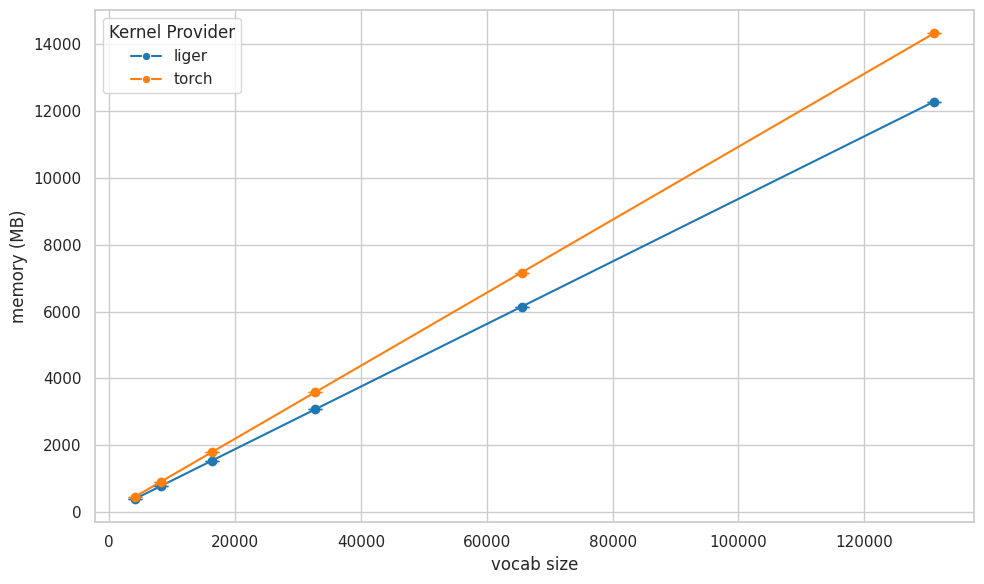

In [3]:
kernel_name = "kl_div"
metric_name = "memory"
kernel_operation_mode = "full"

filtered_data = data[
    (data["kernel_name"] == kernel_name)
    & (data["metric_name"] == metric_name)
    & (data["kernel_operation_mode"] == kernel_operation_mode)
    # Use this to filter by extra benchmark configuration property
    # & (data['extra_benchmark_config'].apply(lambda x: x.get('H') == 4096))
]

print(filtered_data)
if len(filtered_data) == 0:
    raise ValueError("No data found for the specified filter")

xlabel = filtered_data["x_label"].iloc[0]
ylabel = f"{metric_name} ({filtered_data['metric_unit'].iloc[0]})"
# Sort by "kernel_provider" to ensure consistent color assignment
filtered_data = filtered_data.sort_values(by="kernel_provider")

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.lineplot(
    data=filtered_data,
    x="x_value",
    y="y_value_50",
    hue="kernel_provider",
    marker="o",
    palette="tab10",
    errorbar=("ci", None),
)

# Seaborn can't plot pre-computed error bars, so we need to do it manually
lines = ax.get_lines()
colors = [line.get_color() for line in lines]

for (kernel_provider, group_data), color in zip(
    filtered_data.groupby("kernel_provider"), colors
):
    # for i, row in group_data.iterrows():
    y_error_lower = group_data["y_value_50"] - group_data["y_value_20"]
    y_error_upper = group_data["y_value_80"] - group_data["y_value_50"]
    y_error = [y_error_lower, y_error_upper]

    plt.errorbar(
        group_data["x_value"],
        group_data["y_value_50"],
        yerr=y_error,
        fmt="o",
        color=color,
        capsize=5,
    )
plt.legend(title="Kernel Provider")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.tight_layout()

print("Summary of filtered data found:")
print(filtered_data.describe(include="all"))